In [1]:
import os

import matplotlib.pyplot as plt

from src.utils import annotation2mask


from pathlib import Path
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from dotenv import load_dotenv


load_dotenv()
np.random.seed(0)

In [2]:

dataset_path = Path(os.environ['dataset_path'])

train_csv = dataset_path / "train.csv"
train_images = dataset_path / "train"

In [3]:
train_data = pd.read_csv(train_csv)
train_data.head(5)


id                                         annotation  width  \
0  0030fd0e6378  118145 6 118849 7 119553 8 120257 8 120961 9 1...    704   
1  0030fd0e6378  189036 1 189739 3 190441 6 191144 7 191848 8 1...    704   
2  0030fd0e6378  173567 3 174270 5 174974 5 175678 6 176382 7 1...    704   
3  0030fd0e6378  196723 4 197427 6 198130 7 198834 8 199538 8 2...    704   
4  0030fd0e6378  167818 3 168522 5 169225 7 169928 8 170632 9 1...    704   

   height cell_type plate_time sample_date  \
0     520    shsy5y  11h30m00s  2019-06-16   
1     520    shsy5y  11h30m00s  2019-06-16   
2     520    shsy5y  11h30m00s  2019-06-16   
3     520    shsy5y  11h30m00s  2019-06-16   
4     520    shsy5y  11h30m00s  2019-06-16   

                            sample_id elapsed_timedelta  
0  shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00  
1  shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00  
2  shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00  
3  shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00  
4  shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73585 entries, 0 to 73584
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 73585 non-null  object
 1   annotation         73585 non-null  object
 2   width              73585 non-null  int64 
 3   height             73585 non-null  int64 
 4   cell_type          73585 non-null  object
 5   plate_time         73585 non-null  object
 6   sample_date        73585 non-null  object
 7   sample_id          73585 non-null  object
 8   elapsed_timedelta  73585 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
for col in train_data[['id', 'width', 'height', 'cell_type']]:
    print(f"col: {col}, unique_values: {train_data[col].unique()[:20]}")

print(f"Number unique pictures: {len(train_data.id.unique())}")


col: id, unique_values: ['0030fd0e6378' '0140b3c8f445' '01ae5a43a2ab' '026b3c2c4b32'
 '029e5b3b89c7' '0323e81d23d9' '03b27b381a5f' '042c17cd9143'
 '042dc0e561a4' '04928f0866b0' '049f02e0f764' '04cd81dfb245'
 '053d61766edb' '05c61f0f46b7' '061b49d7dbbb' '06c5740c8b18'
 '0728b8f39241' '07e9ba109e34' '083b178bb184' '085eb8fec206']
col: width, unique_values: [704]
col: height, unique_values: [520]
col: cell_type, unique_values: ['shsy5y' 'astro' 'cort']
Number unique pictures: 606


In [6]:
## Each image contains only one labeled type of cells
for image_id in train_data.id.unique():
    filtered_df = train_data[train_data.id == image_id]

    cell_types = filtered_df.cell_type.unique()
    assert len(cell_types) == 1

There are only 606 images in train data and 73585 cell annotation.

All images are the same size - 704*520

List of unique types of cells: ['shsy5y' 'astro' 'cort']


<AxesSubplot:>

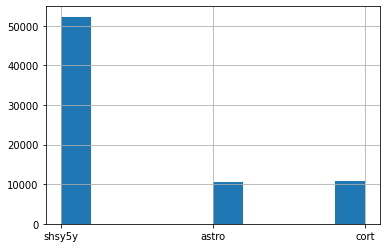

In [7]:
unique_names = train_data.cell_type.unique()
print(f"List of unique types of cells: {unique_names}")

train_data.cell_type.hist()

There are 3 types of cells: shsy5y, astro, cort, let's visualize 10 images of each type.

In [8]:
def visualize_image_with_annotations(cell_annotations: pd.Series):
    single_cell_masks = np.array(list(map(annotation2mask, cell_annotations)))

    image_mask = np.sum(single_cell_masks, axis=0)
    image_mask[image_mask > 1] = 1
    yellow_mask = np.stack([image_mask, image_mask, np.zeros_like(image_mask)], axis=2)

    image_with_mask = np.array(image + 50 * yellow_mask, dtype=np.uint8)
    return image_with_mask

Displaying shsy5y cell type...


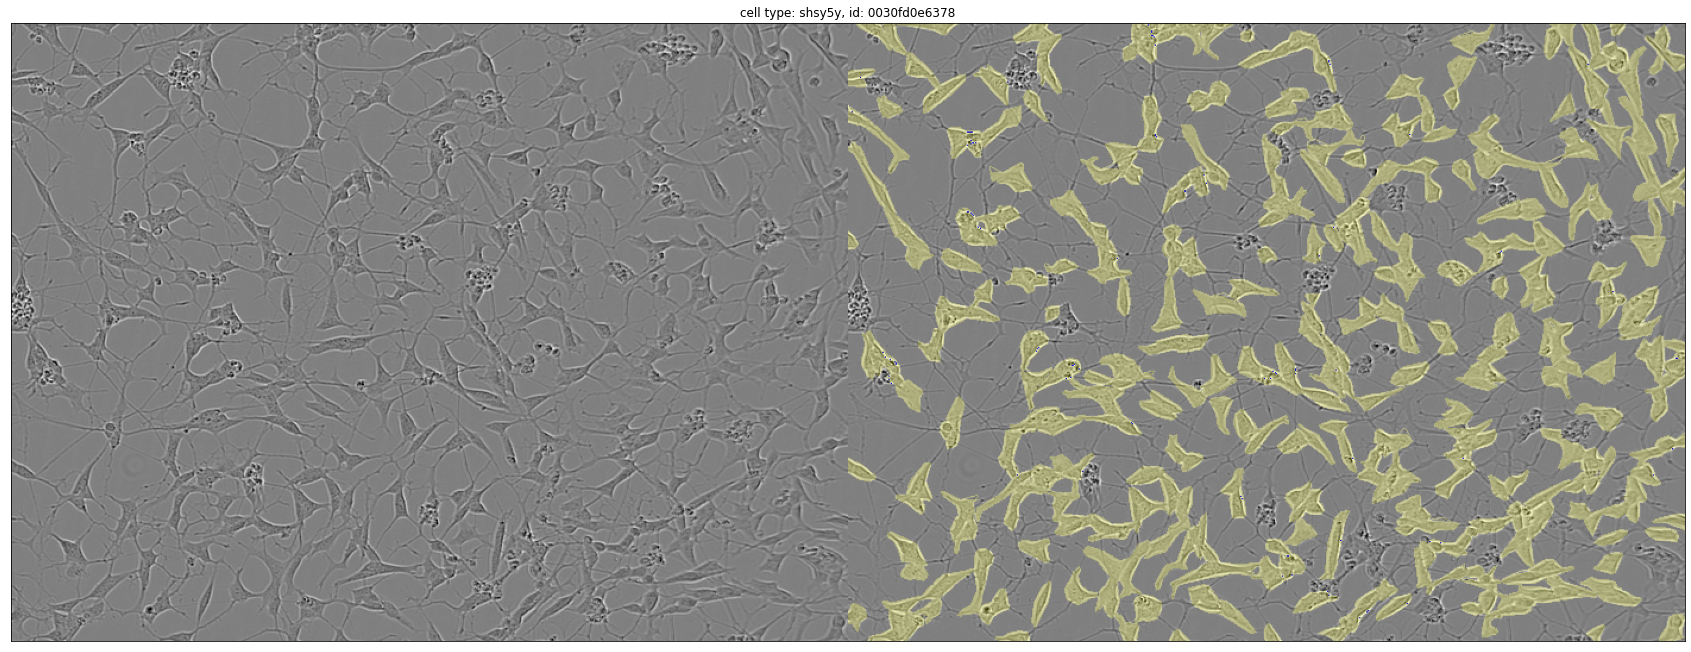

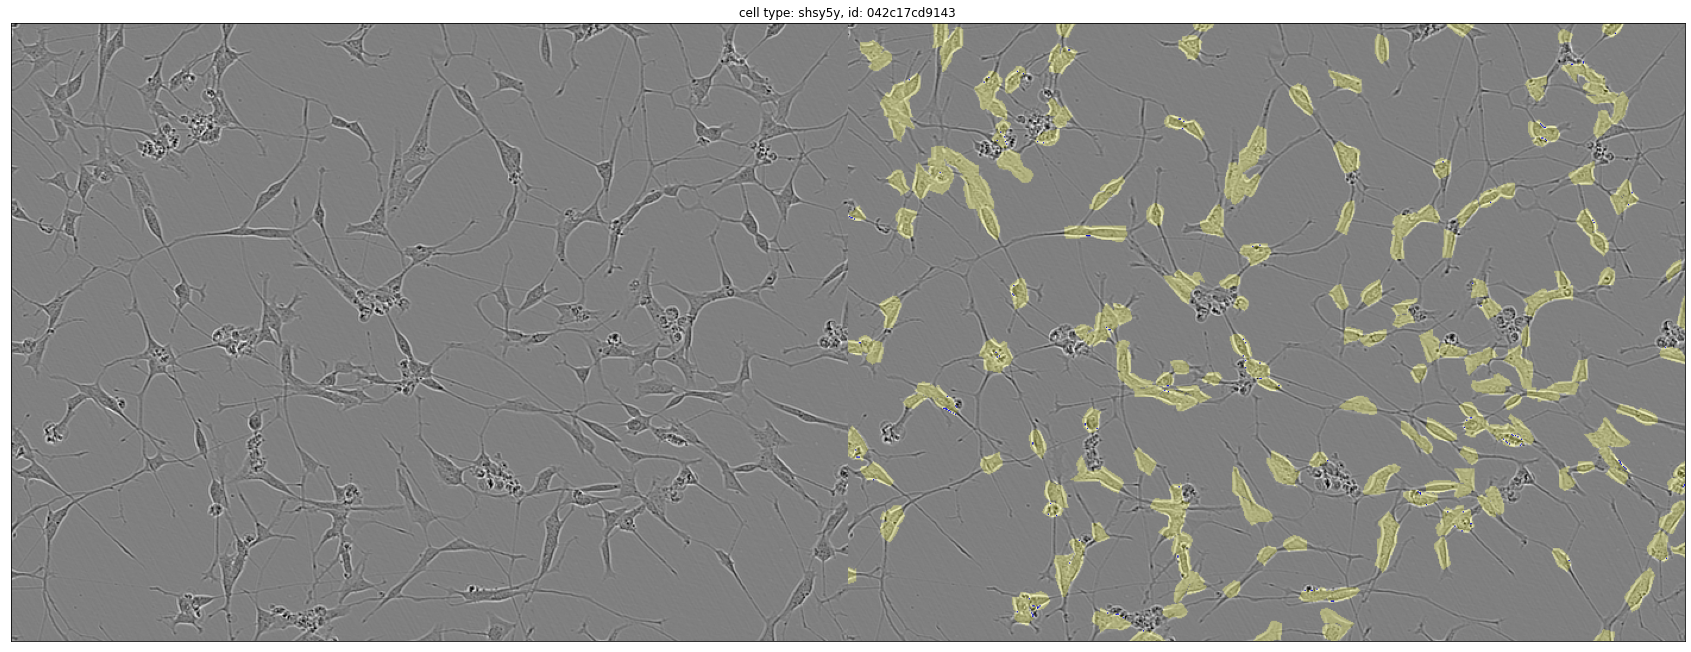

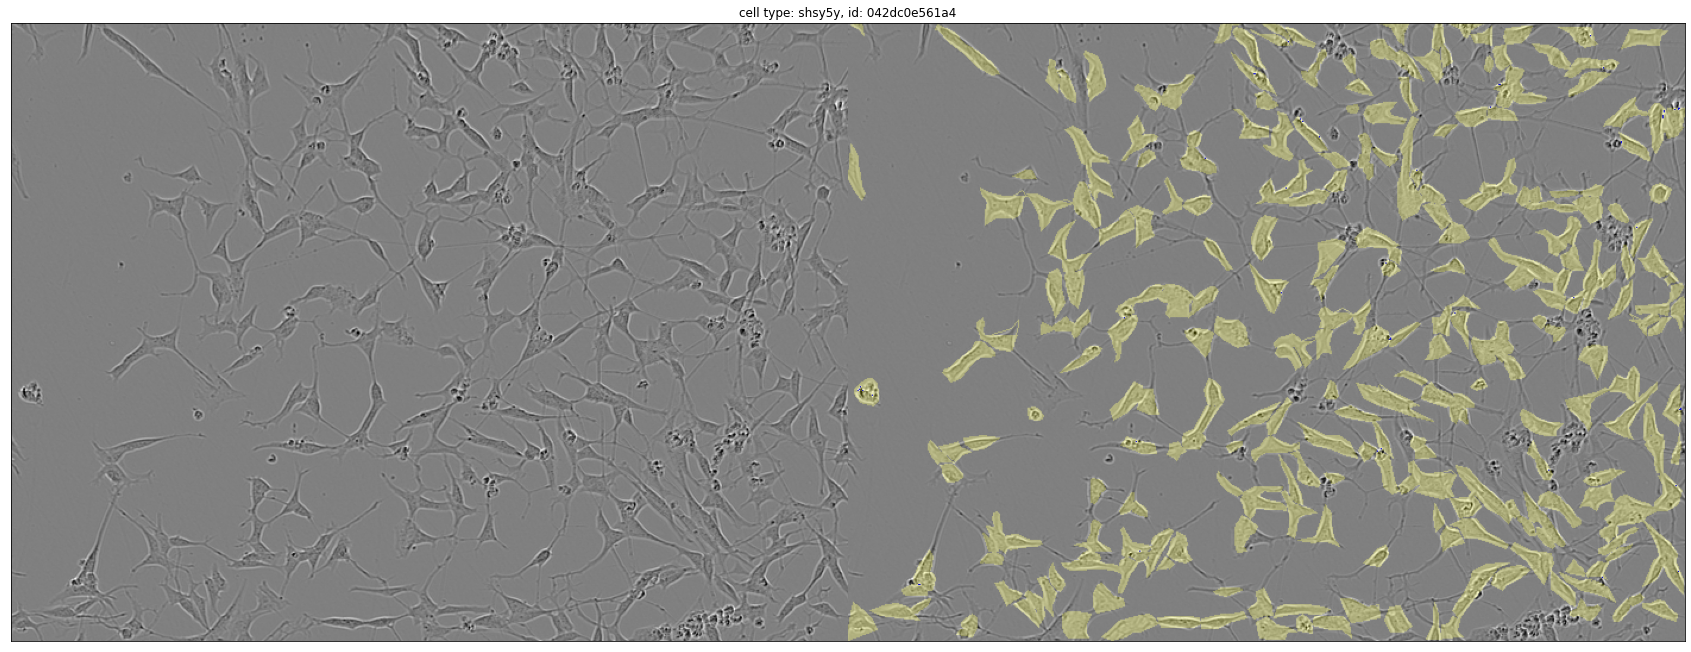

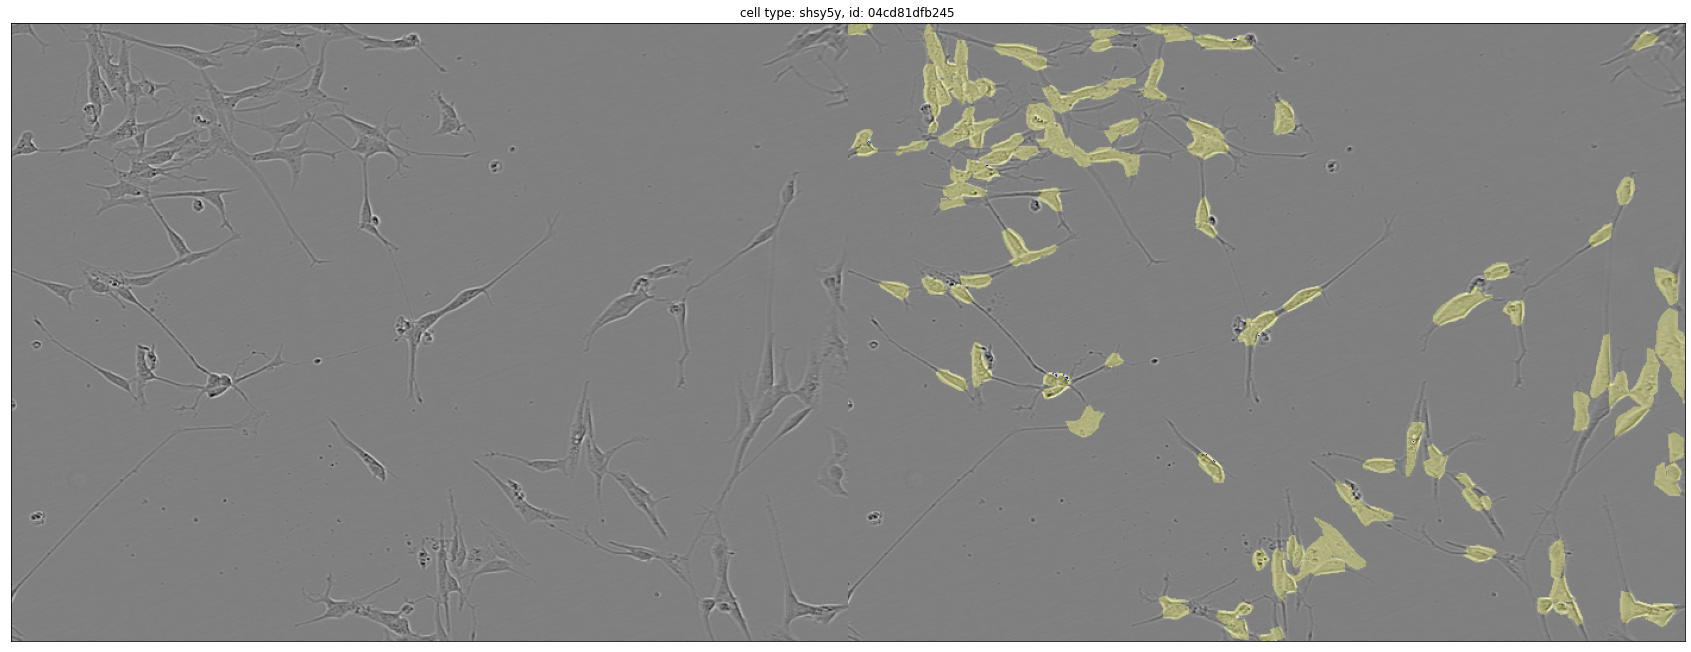

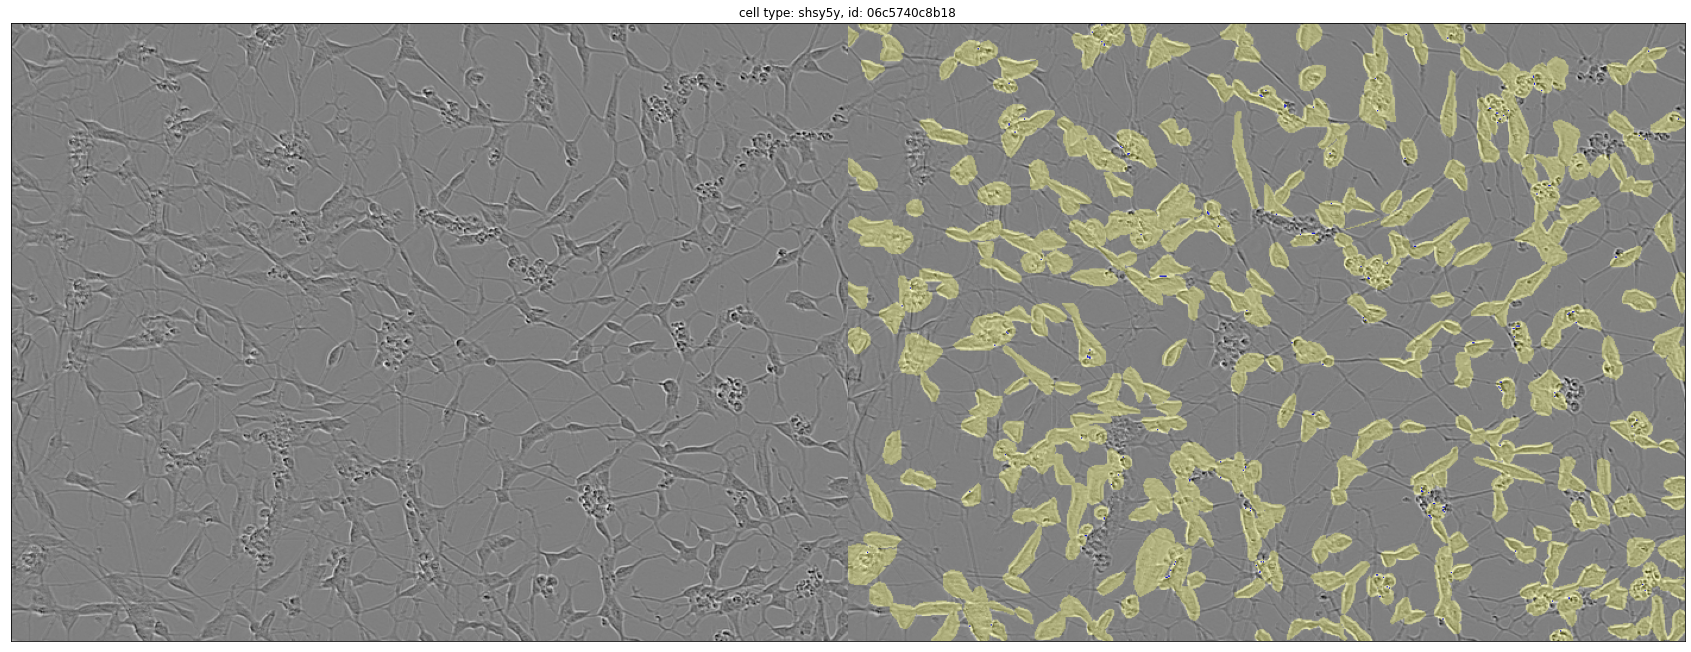

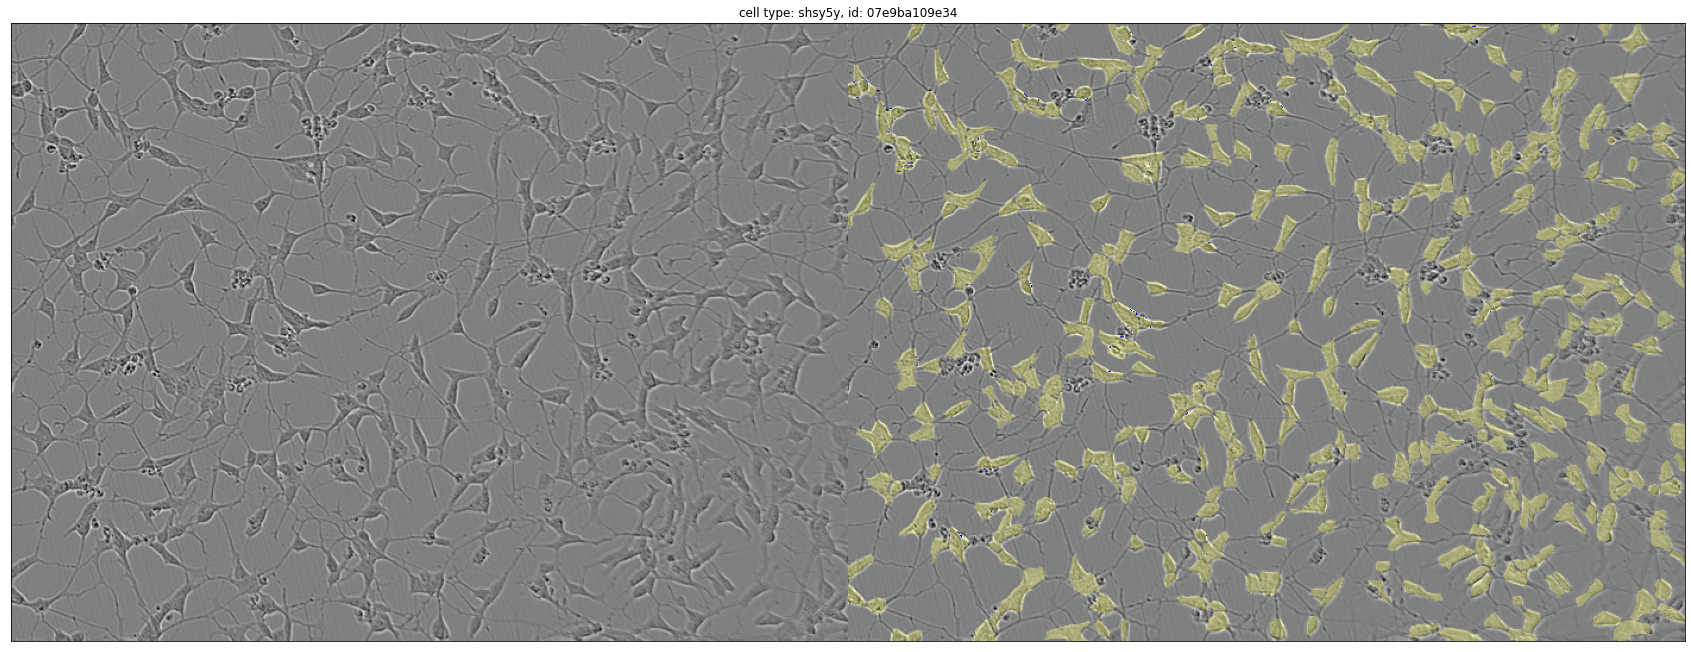

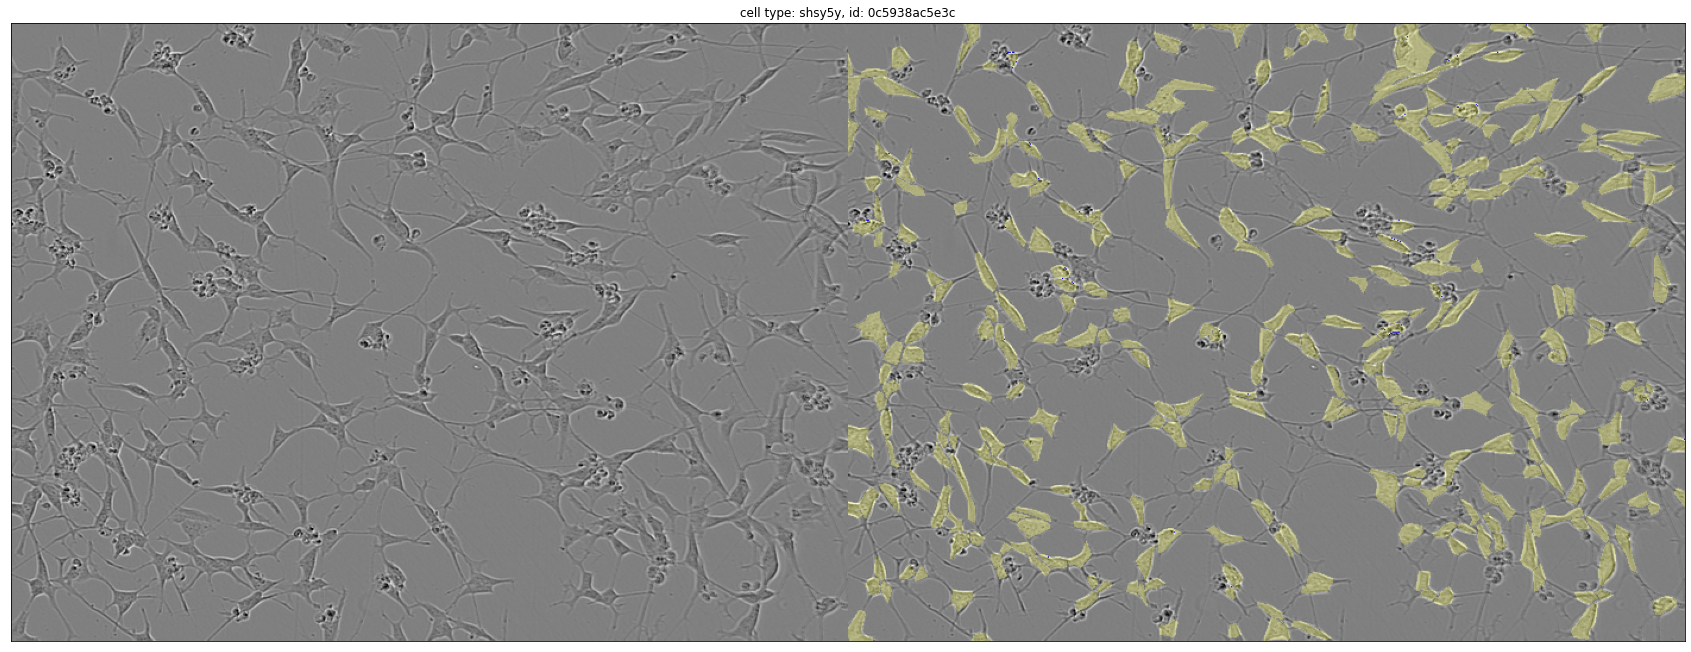

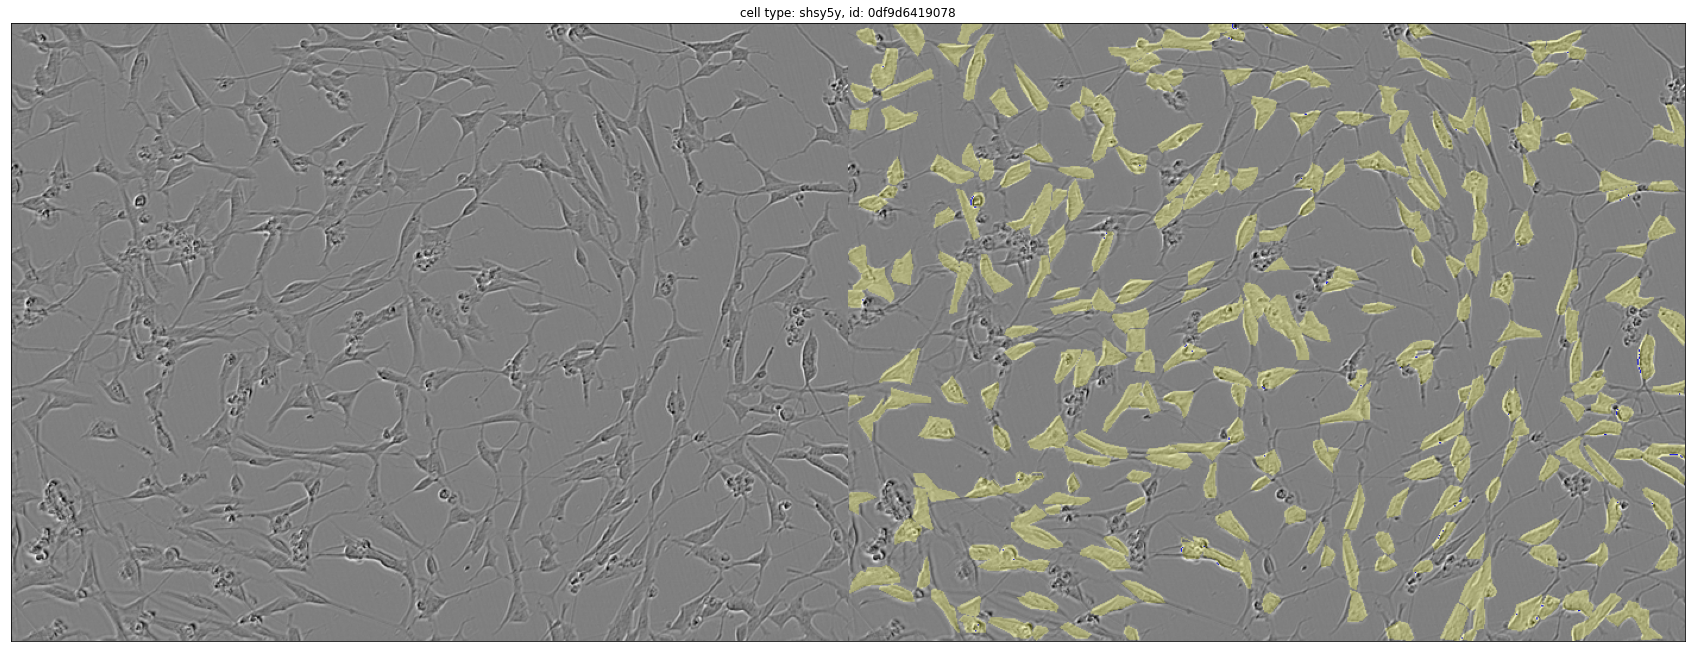

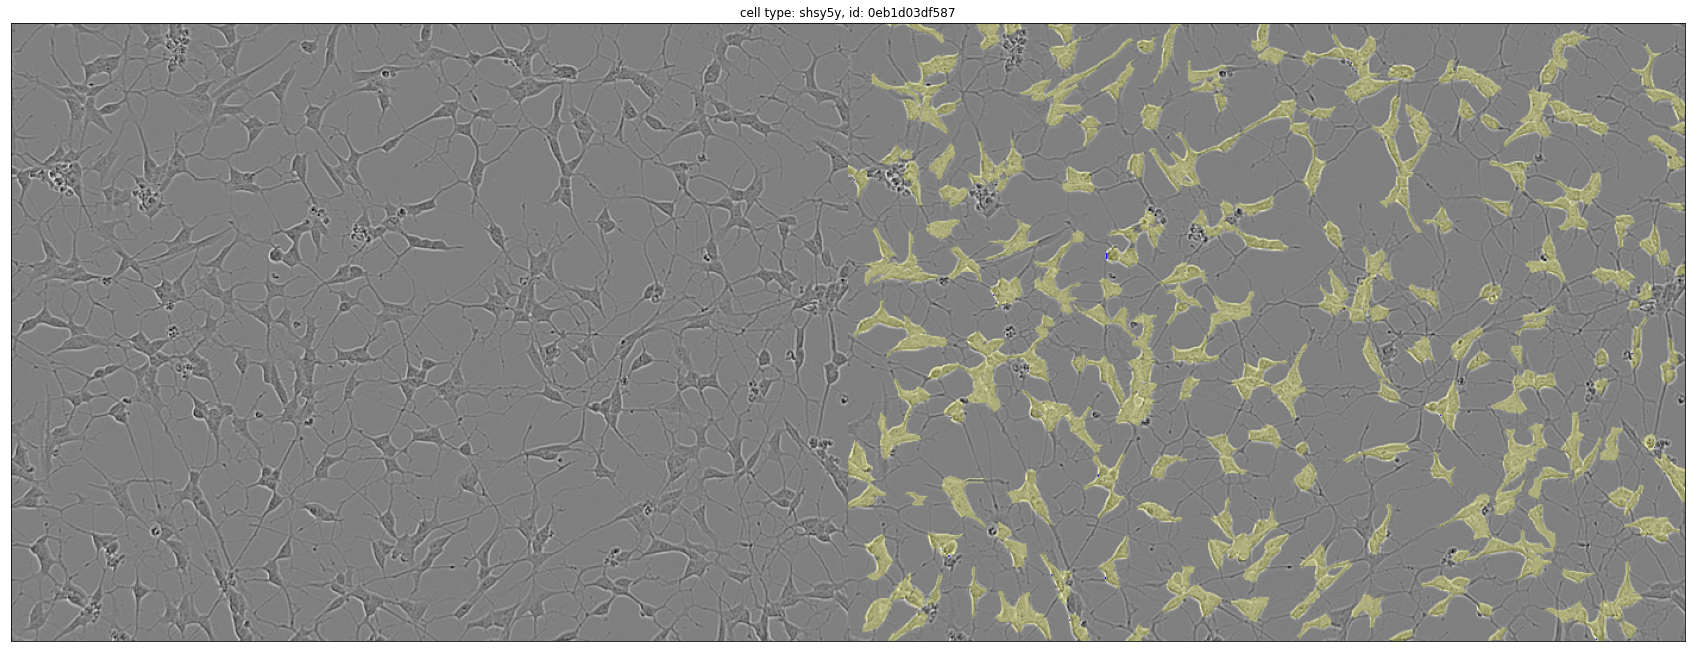

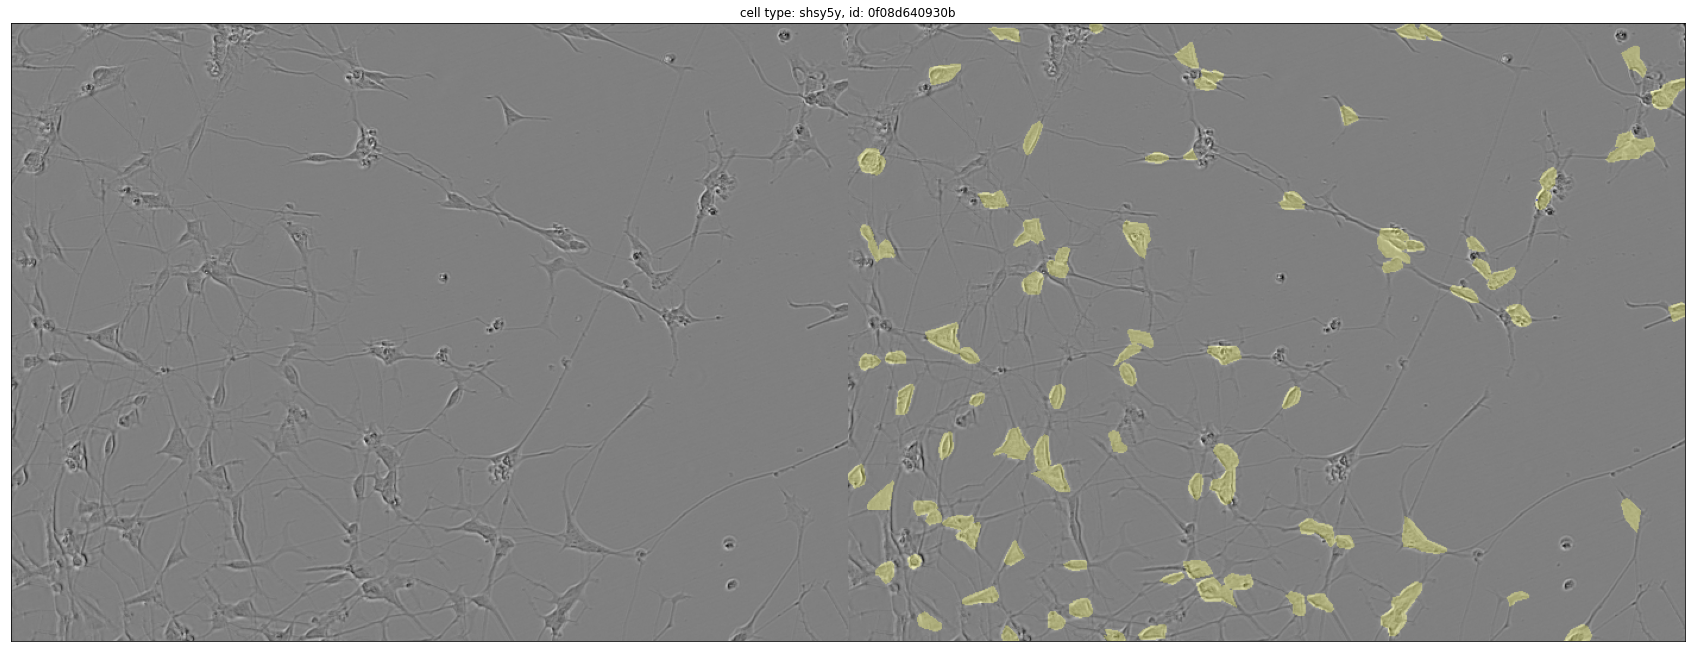

In [9]:
plt.rcParams["figure.figsize"] = (30, 30)

n_images = 10
for name in unique_names:
    print(f"Displaying {name} cell type...")
    data = train_data[train_data.cell_type == name]

    for image_id in data.id.unique()[:n_images]:
        image = imread(str(train_images / f"{image_id}.png"))
        image = gray2rgb(image)

        visualization = visualize_image_with_annotations(data[data.id == image_id].annotation)
        plt.imshow(np.concatenate([image, visualization], axis=1))
        plt.title(f"cell type: {name}, id: {image_id}")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()
    break

